### Practical Sheet 2: Linear Regression

#### 00-Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

#### 01-Data & Transformation

In [2]:
##########################################################
# read file and select th amount of rows
##########################################################

def load_data_csv(file_name,rows_number=0):
    if rows_number > 0 :
        df = pd.read_csv(file_name, nrows=rows_number)
    else:
        df = pd.read_csv(file_name) 
    return df

In [198]:
df = load_data_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
##########################################################
# change text columns to number
##########################################################

def change_columns(dataframe_input):
    #change column sex from char to int
    dataframe_input['sex'] =  dataframe_input['sex'].replace('male', 0)
    dataframe_input['sex'] =  dataframe_input['sex'].replace('female', 1)

    #change column smoker from char to int
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('no', 0)
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('yes', 1)

    #change column region from char to int
    #When latitude is north=0 and south=1 and longitude is east=0 and west=1
    for i in range(0,len(dataframe_input)):
        if dataframe_input.loc[i, 'region'] == "southwest":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 1
        elif dataframe_input.loc[i, 'region'] == "southeast":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 0
        elif dataframe_input.loc[i, 'region'] == "northwest":
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 1
        else:
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 0
    dataframe_input.drop(['region'], axis=1, inplace=True)

    return dataframe_input

In [199]:
df = change_columns(df)

In [11]:
df.head(20)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,0.0,0.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,0.0,0.0
6,46,1,33.440,1,0,8240.58960,0.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


#### 02- Explore Data Analisis

<AxesSubplot:>

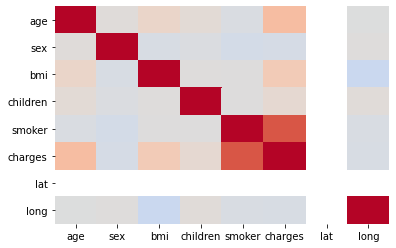

In [11]:
#get correlations of each features in dataset
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

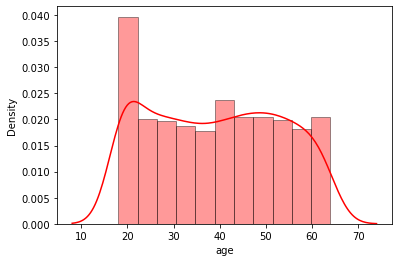

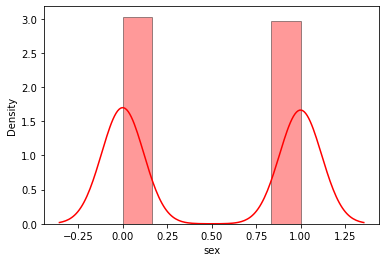

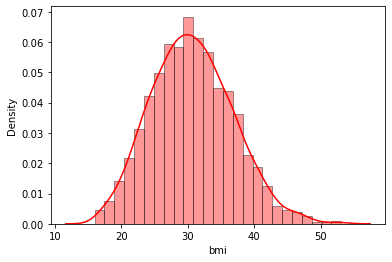

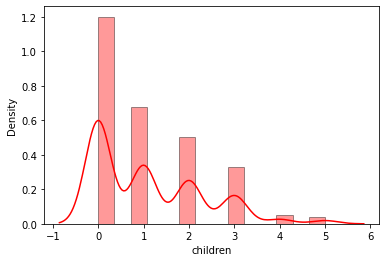

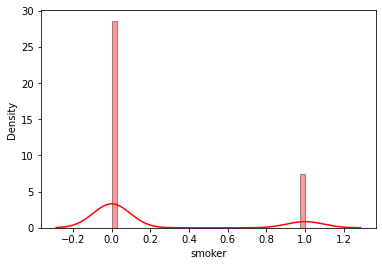

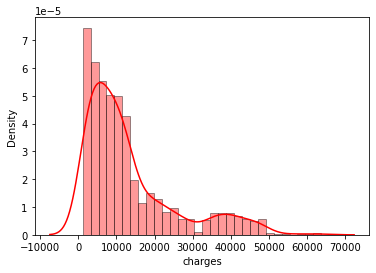

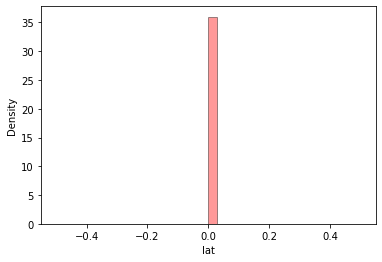

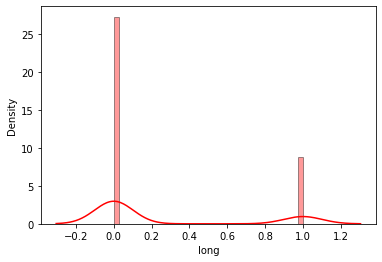

In [15]:
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], color='red', hist_kws={"edgecolor": 'black'})

In [16]:
#1. Implement one Python script to generate, by brute-force, “N” hypotheses of linear regression models, and keep the best one.

#### 03-Build Math Functions one Variable

In [4]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = load_data_csv(file_name="insurance.csv",rows_number=100)
df = change_columns(dataframe_input=df)

In [6]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array(df.values[:,0])
y_train = np.array(df.values[:,5])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [19. 18. 28. 33. 32. 31. 46. 37. 37. 60. 25. 62. 23. 56. 27. 19. 52. 23.
 56. 30. 60. 30. 18. 34. 37. 59. 63. 55. 23. 31. 22. 18. 19. 63. 28. 19.
 62. 26. 35. 60. 24. 31. 41. 37. 38. 55. 18. 28. 60. 36. 18. 21. 48. 36.
 40. 58. 58. 18. 53. 34. 43. 25. 64. 28. 20. 19. 61. 40. 40. 28. 27. 31.
 53. 58. 44. 57. 29. 21. 22. 41. 31. 45. 22. 48. 37. 45. 57. 56. 46. 55.
 21. 53. 59. 35. 64. 28. 54. 55. 56. 38.]
y_train = [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692  2721.3208  27808.7251
  1826.843   11090.7178  39611.7577   1837.237   10797.3362   2395.17155
 10602.385   36837.467   13228.84695  4149.736    1137.011   37701.8768
  6203.90175 14001.1338  14451.83515 12268.63225  2775.19215 38711.
 35585.576    2198.18985  4687.797   13770.0979  51194.55914  1625.43375
 15612.19335  2302.3     39774.2763  48173.361    3046.062    4949.7587
  6272.4772   6313.759    6079.6715  20630.28351  3393.35635  3556.9223

In [13]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [7]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (100,)
Number of training examples is: 100


In [8]:
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (18.0, 1725.5523)


##### 03.01-Plot data in scatter

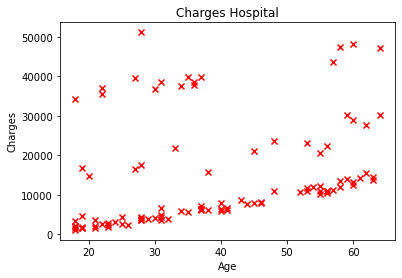

In [9]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Charges Hospital")
# Set the y-axis label
plt.ylabel('Charges')
# Set the x-axis label
plt.xlabel('Age')
plt.show()

In [10]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


##### 03.02- Function of Linear Regression

In [5]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

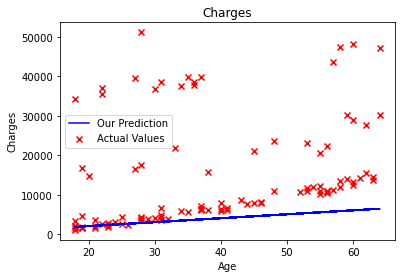

In [12]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')


# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')


# Set the title
plt.title("Charges")
# Set the y-axis label
plt.ylabel('Charges')
# Set the x-axis label
plt.xlabel('Age')
plt.legend()

plt.show()


##### 03.03-Cost Function of w

In [6]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [7]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [15]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

c:\Users\rene_\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:176: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  self.manager.handle_json(content)


##### 03.04-Gradient descent

In [13]:
df = load_data_csv(file_name="insurance.csv",rows_number=100)
df = change_columns(dataframe_input=df)
x_train = np.array(df.values[:,0])
y_train = np.array(df.values[:,5])
df.head(20)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,0.0,0.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,0.0,0.0
6,46,1,33.440,1,0,8240.58960,0.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [8]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [9]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [10]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

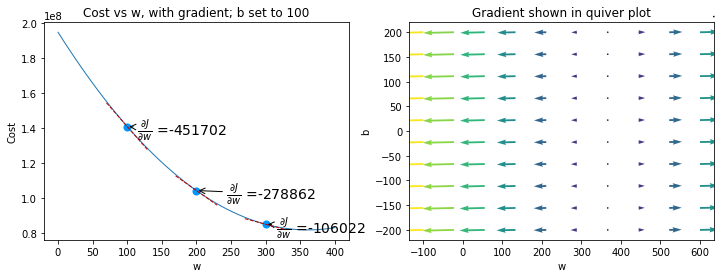

In [16]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [75]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.04e+10  dj_dw: -6.284e+05, dj_db: -1.459e+04   w:  6.284e+03, b: 1.45879e+02
Iteration   10: Cost 5.27e+34  dj_dw: -8.283e+17, dj_db: -1.862e+16   w:  7.804e+15, b: 1.75387e+14
Iteration   20: Cost 9.15e+58  dj_dw: -1.092e+30, dj_db: -2.454e+28   w:  1.029e+28, b: 2.31172e+26
Iteration   30: Cost 1.59e+83  dj_dw: -1.439e+42, dj_db: -3.234e+40   w:  1.356e+40, b: 3.04701e+38
Iteration   40: Cost 2.76e+107  dj_dw: -1.897e+54, dj_db: -4.263e+52   w:  1.787e+52, b: 4.01617e+50
Iteration   50: Cost 4.80e+131  dj_dw: -2.500e+66, dj_db: -5.618e+64   w:  2.356e+64, b: 5.29359e+62
Iteration   60: Cost 8.34e+155  dj_dw: -3.295e+78, dj_db: -7.406e+76   w:  3.105e+76, b: 6.97732e+74
Iteration   70: Cost 1.45e+180  dj_dw: -4.343e+90, dj_db: -9.761e+88   w:  4.092e+88, b: 9.19658e+86
Iteration   80: Cost 2.52e+204  dj_dw: -5.725e+102, dj_db: -1.287e+101   w:  5.394e+100, b: 1.21217e+99
Iteration   90: Cost 4.37e+228  dj_dw: -7.546e+114, dj_db: -1.696e+113   w:  7.109e+112, b: 

In [76]:
print(f"Age 23 prediction {w_final*(23/1000) + b_final:0.1f} Charges")
print(f"Age 50 prediction{w_final*(50/1000) + b_final:0.1f} Charges")
print(f"Age 100 prediction {w_final*(100/1000) + b_final:0.1f} Charges")

Age 23 prediction -261539363194473072673496149792593371431195074139169083050001859230357495533117466290646007233389917491515113345886808178688.0 Charges
Age 50 prediction-416829661350356063522696518627165251412717452365595254662310531685903622548455181115907578577336576341620824403905968340992.0 Charges
Age 100 prediction -704404287564954281707978045129454950988892107945533623414087662467280550624672117170429937162735702497335044317597117972480.0 Charges


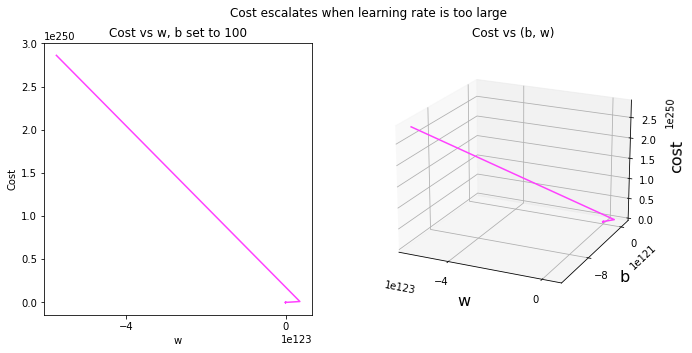

In [77]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

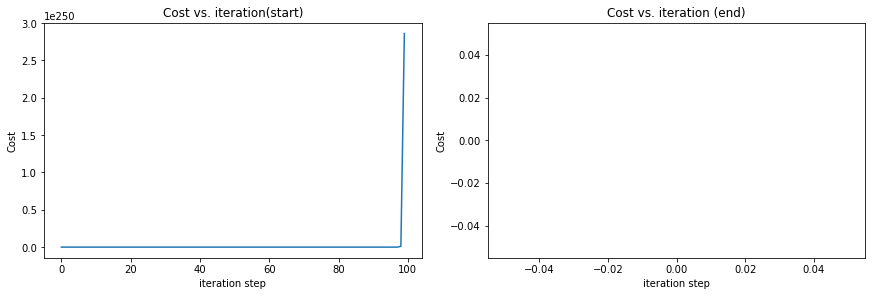

In [25]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

c:\Users\rene_\01-Python\ubi-master-computer-engineering\14469-ML\practical-project-01\lab_utils_uni.py:257: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(w0, b0, z, contours, linewidths=2,


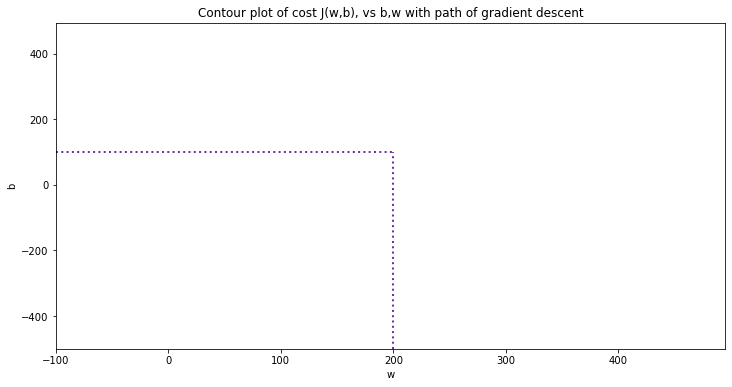

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

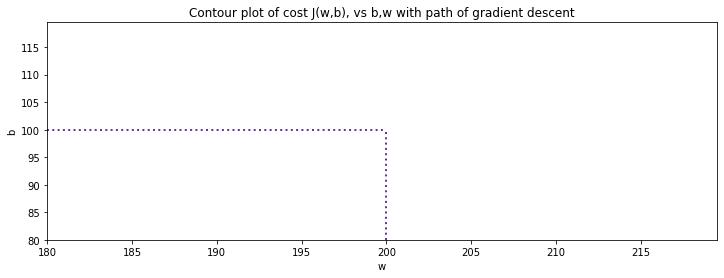

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [73]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.16e+12  dj_dw: -6.284e+05, dj_db: -1.459e+04   w:  5.027e+04, b: 1.16703e+03
Iteration    1: Cost 4.06e+16  dj_dw:  8.631e+07, dj_db:  1.939e+06   w: -6.855e+06, b:-1.53971e+05
Iteration    2: Cost 7.67e+20  dj_dw: -1.185e+10, dj_db: -2.664e+08   w:  9.415e+08, b: 2.11581e+07
Iteration    3: Cost 1.45e+25  dj_dw:  1.628e+12, dj_db:  3.659e+10   w: -1.293e+11, b:-2.90587e+09
Iteration    4: Cost 2.73e+29  dj_dw: -2.236e+14, dj_db: -5.025e+12   w:  1.776e+13, b: 3.99098e+11
Iteration    5: Cost 5.15e+33  dj_dw:  3.071e+16, dj_db:  6.901e+14   w: -2.439e+15, b:-5.48128e+13
Iteration    6: Cost 9.71e+37  dj_dw: -4.218e+18, dj_db: -9.479e+16   w:  3.350e+17, b: 7.52809e+15
Iteration    7: Cost 1.83e+42  dj_dw:  5.793e+20, dj_db:  1.302e+19   w: -4.601e+19, b:-1.03392e+18
Iteration    8: Cost 3.45e+46  dj_dw: -7.956e+22, dj_db: -1.788e+21   w:  6.319e+21, b: 1.42001e+20
Iteration    9: Cost 6.51e+50  dj_dw:  1.093e+25, dj_db:  2.456e+23   w: -8.678e+23, b:-1.95026e+22


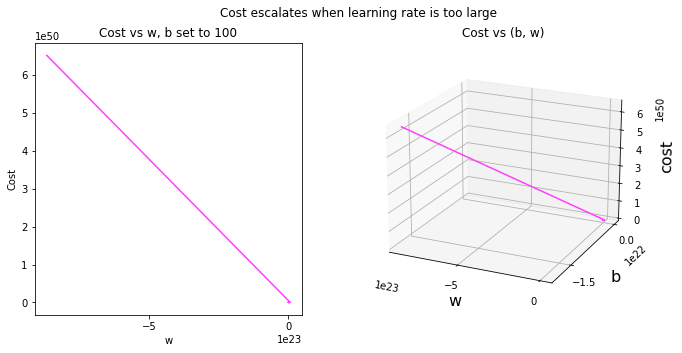

In [74]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

#### 04-Build Math Functions Multiple Variable

##### 04.01-Raw data and aplly Functions

In [18]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [19]:
df = load_data_csv(file_name="insurance.csv")
df = change_columns(dataframe_input=df)
df.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [20]:
X_train = np.array(df[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df["charges"].values)

In [22]:
b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [23]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [24]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [25]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [19.   1.  27.9  0.   1.   1.   1. ]
f_wb shape (), prediction: 1424.4


In [26]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [27]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 140824854.83447534


In [28]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [29]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -11686.78044899777
dj_dw at initial w,b: 
 [-508374.93   -5442.4  -371125.27  -13781.14   -6238.71   -6156.49
   -5264.45]


In [30]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [31]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
#iterations = 50000
iterations = 500
alpha = 1.0e-6
#alpha = 1.0e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape


prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]
    

Iteration    0: Cost 160819618.90   
Iteration   50: Cost 138728836.05   
Iteration  100: Cost 121749176.57   
Iteration  150: Cost 108698038.97   
Iteration  200: Cost 98666449.75   
Iteration  250: Cost 90955751.92   
Iteration  300: Cost 85028942.37   
Iteration  350: Cost 80473268.68   
Iteration  400: Cost 76971480.32   
Iteration  450: Cost 74279731.51   
b,w found by gradient descent: 3.65,[158.85   1.63 117.59   4.46   2.68   1.94   1.57] 
prediction: 6310.45, target value: 16884.924
prediction: 6840.42, target value: 1725.5523
prediction: 8347.33, target value: 4449.462
prediction: 7917.28, target value: 21984.47061
prediction: 8484.54, target value: 3866.8552
prediction: 7958.46, target value: 3756.6216
prediction: 11251.17, target value: 8240.5896
prediction: 9159.76, target value: 7281.5056
prediction: 9397.86, target value: 6406.4107
prediction: 12576.62, target value: 28923.136919999997
prediction: 7058.20, target value: 2721.3208
prediction: 12950.30, target value: 27808

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

##### 04.02-Normalize data and aplly Functions

In [290]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [291]:
df_raw = load_data_csv(file_name="insurance.csv")
df_raw = change_columns(dataframe_input=df_raw)
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [292]:
df_raw[["age","sex","bmi","children","smoker","lat","long"]], X_mu, X_sigma = zscore_normalize_features(df_raw[["age","sex","bmi","children","smoker","lat","long"]])
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,16884.92400,0.970538,1.028816
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1725.55230,0.970538,-0.971991
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,4449.46200,0.970538,-0.971991
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,21984.47061,-1.030356,1.028816
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,3866.85520,-1.030356,1.028816
5,-0.584350,1.010519,-0.807656,-0.908614,-0.507463,3756.62160,0.970538,-0.971991
6,0.483668,1.010519,0.455486,-0.078767,-0.507463,8240.58960,0.970538,-0.971991
7,-0.157143,1.010519,-0.479567,1.580926,-0.507463,7281.50560,-1.030356,1.028816
8,-0.157143,-0.989591,-0.136714,0.751079,-0.507463,6406.41070,-1.030356,-0.971991
9,1.480485,1.010519,-0.791252,-0.908614,-0.507463,28923.13692,-1.030356,1.028816


In [293]:
# normalize the original features
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = age         39.207025
sex          0.494768
bmi         30.663397
children     1.094918
smoker       0.204783
lat          0.514948
long         0.485800
dtype: float64, 
X_sigma = age         14.044709
sex          0.499973
bmi          6.095908
children     1.205042
smoker       0.403543
lat          0.499777
long         0.499798
dtype: float64
Peak to Peak range by column in Raw        X:[46.    1.   37.17  5.    1.    1.    1.  ]
Peak to Peak range by column in Normalized X:[3.28 2.   6.1  4.15 2.48  nan 2.33]


In [294]:
X_train = np.array(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df_raw["charges"].values)

In [295]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618, 10, 10, 10])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'float'>


In [296]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [-1.44  1.01 -0.45 -0.91  1.97  0.97  1.03]
f_wb shape (), prediction: 891.4646081185103


In [297]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 151285384.15764958


In [298]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -12485.241128341848
dj_dw at initial w,b: 
 [-3626.     714.49 -2454.37  -850.1  -9522.24  -351.34   878.07]


In [299]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 1.0e-7
#alpha = 1.0e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]
    

Iteration    0: Cost 161323408.01   
Iteration 1000: Cost 161294629.11   
Iteration 2000: Cost 161265856.05   
Iteration 3000: Cost 161237088.81   
Iteration 4000: Cost 161208327.41   
Iteration 5000: Cost 161179571.84   
Iteration 6000: Cost 161150822.09   
Iteration 7000: Cost 161122078.18   
Iteration 8000: Cost 161093340.09   
Iteration 9000: Cost 161064607.82   
b,w found by gradient descent: 13.26,[ 3.62 -0.69  2.4   0.82  9.53  0.35 -0.86] 
prediction: 23.74, target value: 16884.924
prediction: 5.99, target value: 1725.5523
prediction: 9.63, target value: 4449.462
prediction: 2.39, target value: 21984.47061
prediction: 4.56, target value: 3866.8552
prediction: 4.11, target value: 3756.6216
prediction: 11.68, target value: 8240.5896
prediction: 6.07, target value: 7281.5056
prediction: 9.32, target value: 6406.4107
prediction: 9.19, target value: 28923.136919999997
prediction: 3.44, target value: 2721.3208
prediction: 35.91, target value: 27808.7251
prediction: 5.11, target value

In [300]:
from lab_utils_multi import  load_house_data, run_gradient_descent 

In [302]:
w_norm, b_norm, hist = run_gradient_descent(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values, y_train, 10000, 1.0e-7, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.61323e+08  3.6e-04 -6.9e-05  2.4e-04  8.2e-05  1.3e-03 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     1000 1.61295e+08  3.6e-01 -6.9e-02  2.4e-01  8.2e-02  1.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     2000 1.61266e+08  7.2e-01 -1.4e-01  4.8e-01  1.6e-01  2.7e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     3000 1.61237e+08  1.1e+00 -2.1e-01  7.2e-01  2.5e-01  4.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     4000 1.61208e+08  1.4e+00 -2.8e-01  9.6e-01  3.3e-01  5.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     5000 1.61180e+08  1.8e+00 -3.5e-01  1.2e+00  4.1e-01  6.6e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
     6000 1.61151e+08  2.2e+00 -4.2e-01  1.4e+00  4.9e-01  8.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -

In [306]:
# First, normalize out example.
x_house = np.array(test[0])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted charge = ${x_house_predict*1000:0.0f}")

age        -1.438764
sex         1.010519
bmi        -0.453320
children   -0.908614
smoker      1.970587
lat         0.970538
long        1.028816
dtype: float64
 predicted charge = $23744


In [307]:
m,_ = X_train.shape
prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    x_house = np.array(test[i])
    x_house_norm = (x_house - X_mu) / X_sigma
    prediction_values[i] = np.dot(x_house_norm, w_norm) + b_norm
    target_values[i] = y_train[i]    

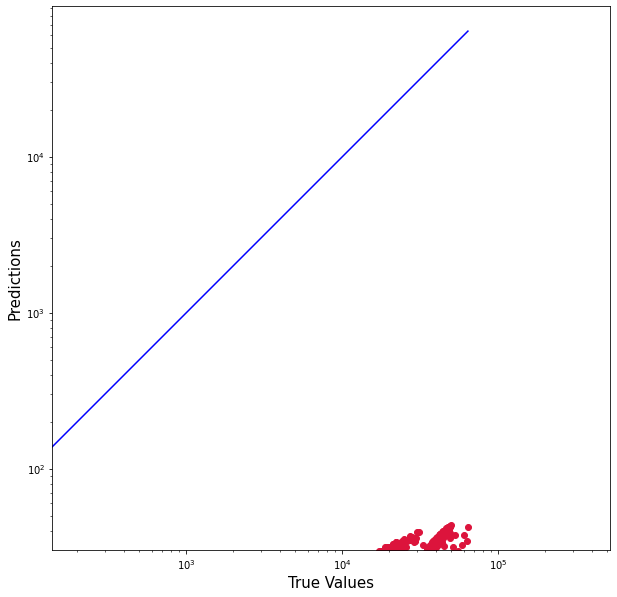

In [308]:
plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### 04.03-K Fold Aplication

In [44]:
df = load_data_csv(file_name="insurance.csv")
df = change_columns(dataframe_input=df)
df = df.reindex(np.random.permutation(df.index))
df = df.reset_index(drop=True)    
df.shape

(1338, 8)

In [45]:
#folds                                                              
fold1 = df.loc[0:223]                                            
fold2 = df.loc[224:446]
fold3 = df.loc[447:669]
fold4 = df.loc[670:893]
fold5 = df.loc[894:1117]
fold6 = df.loc[1118:1338]

In [49]:
df_1 = pd.concat([fold1, fold2, fold3, fold4, fold5])
test_val1 = fold6

df_2 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val2 = fold5

df_3 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val3 = fold4

df_4 = pd.concat([fold1, fold2, fold4, fold5, fold6])
test_val4 = fold3

df_5 = pd.concat([fold1, fold3, fold4, fold5, fold6])
test_val5 = fold2

df_6 = pd.concat([fold2, fold3, fold4, fold5, fold6])
test_val6 = fold1

In [62]:
def run_model(df_fold, test_fold):
    X_train = np.array(df_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_train = np.array(df_fold["charges"].values)
    X_test = np.array(test_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_test = np.array(test_fold["charges"].values)

    # initialize parameters
    initial_w = np.zeros_like(w_init)
    initial_b = 0.
    # some gradient descent settings
    iterations = 500
    alpha = 1.0e-6
    #alpha = 1.0e-2
    # run gradient descent 
    w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient, 
                                                        alpha, iterations)
    print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
    m,_ = X_train.shape
    t,_ = X_test.shape

    prediction_values = np.zeros(t)
    target_values = np.zeros(t)
    for i in range(m):
        print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

    for i in range(t):
        prediction_values[i] = np.dot(X_test[i], w_final) + b_final
        target_values[i] = y_test[i]
    
    plt.figure(figsize=(5,5))
    plt.scatter(target_values, prediction_values, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(prediction_values), max(target_values))
    p2 = min(min(prediction_values), min(target_values))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    return plt.show()

In [63]:
run_model(df_fold=df_1, test_fold=test_val1)

Iteration    0: Cost 162600447.82   
Iteration   50: Cost 140465785.96   
Iteration  100: Cost 123413716.77   
Iteration  150: Cost 110277120.29   
Iteration  200: Cost 100156883.32   
Iteration  250: Cost 92360356.86   
Iteration  300: Cost 86353945.46   
Iteration  350: Cost 81726583.72   
Iteration  400: Cost 78161599.50   
Iteration  450: Cost 75415038.38   
b,w found by gradient descent: 3.68,[159.28   1.68 118.64   4.46   2.7    1.97   1.63] 
prediction: 13259.61, target value: 14590.63205
prediction: 10192.65, target value: 19214.705530000003
prediction: 13017.10, target value: 14254.6082
prediction: 8635.80, target value: 4149.736
prediction: 9503.00, target value: 6389.37785
prediction: 14079.59, target value: 12648.7034
prediction: 7112.53, target value: 1980.07
prediction: 9307.30, target value: 39611.7577
prediction: 6718.73, target value: 1769.53165
prediction: 8691.57, target value: 5003.853
prediction: 12236.91, target value: 11837.16
prediction: 8372.98, target value: 6

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [64]:
run_model(df_fold=df_2, test_fold=test_val2)

Iteration    0: Cost 159689951.45   
Iteration   50: Cost 137847793.41   
Iteration  100: Cost 121057582.85   
Iteration  150: Cost 108150794.98   
Iteration  200: Cost 98229186.98   
Iteration  250: Cost 90602281.26   
Iteration  300: Cost 84739308.96   
Iteration  350: Cost 80232269.05   
Iteration  400: Cost 76767531.90   
Iteration  450: Cost 74104010.97   
b,w found by gradient descent: 3.64,[158.28   1.59 116.55   4.37   2.68   1.95   1.57] 
prediction: 13132.34, target value: 14590.63205
prediction: 10079.82, target value: 19214.705530000003
prediction: 12901.32, target value: 14254.6082
prediction: 8537.68, target value: 4149.736
prediction: 9407.69, target value: 6389.37785
prediction: 13939.71, target value: 12648.7034
prediction: 7023.26, target value: 1980.07
prediction: 9192.05, target value: 39611.7577
prediction: 6636.40, target value: 1769.53165
prediction: 8599.69, target value: 5003.853
prediction: 12125.88, target value: 11837.16
prediction: 8288.53, target value: 64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
run_model(df_fold=df_3, test_fold=test_val3)

Iteration    0: Cost 159689951.45   
Iteration   50: Cost 137847793.41   
Iteration  100: Cost 121057582.85   
Iteration  150: Cost 108150794.98   
Iteration  200: Cost 98229186.98   
Iteration  250: Cost 90602281.26   
Iteration  300: Cost 84739308.96   
Iteration  350: Cost 80232269.05   
Iteration  400: Cost 76767531.90   
Iteration  450: Cost 74104010.97   
b,w found by gradient descent: 3.64,[158.28   1.59 116.55   4.37   2.68   1.95   1.57] 
prediction: 13132.34, target value: 14590.63205
prediction: 10079.82, target value: 19214.705530000003
prediction: 12901.32, target value: 14254.6082
prediction: 8537.68, target value: 4149.736
prediction: 9407.69, target value: 6389.37785
prediction: 13939.71, target value: 12648.7034
prediction: 7023.26, target value: 1980.07
prediction: 9192.05, target value: 39611.7577
prediction: 6636.40, target value: 1769.53165
prediction: 8599.69, target value: 5003.853
prediction: 12125.88, target value: 11837.16
prediction: 8288.53, target value: 64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [66]:
run_model(df_fold=df_4, test_fold=test_val4)

Iteration    0: Cost 161266634.08   
Iteration   50: Cost 138950982.38   
Iteration  100: Cost 121815290.08   
Iteration  150: Cost 108657114.79   
Iteration  200: Cost 98553141.45   
Iteration  250: Cost 90794387.54   
Iteration  300: Cost 84836449.27   
Iteration  350: Cost 80261297.27   
Iteration  400: Cost 76747940.87   
Iteration  450: Cost 74049902.16   
b,w found by gradient descent: 3.67,[159.25   1.65 118.17   4.59   2.69   1.95   1.6 ] 
prediction: 13243.23, target value: 14590.63205
prediction: 10174.62, target value: 19214.705530000003
prediction: 13003.67, target value: 14254.6082
prediction: 8619.81, target value: 4149.736
prediction: 9489.69, target value: 6389.37785
prediction: 14060.11, target value: 12648.7034
prediction: 7096.51, target value: 1980.07
prediction: 9286.69, target value: 39611.7577
prediction: 6704.15, target value: 1769.53165
prediction: 8677.79, target value: 5003.853
prediction: 12223.53, target value: 11837.16
prediction: 8361.27, target value: 64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [67]:
run_model(df_fold=df_5, test_fold=test_val5)

Iteration    0: Cost 163201499.13   
Iteration   50: Cost 140759340.89   
Iteration  100: Cost 123500204.34   
Iteration  150: Cost 110227022.67   
Iteration  200: Cost 100019202.75   
Iteration  250: Cost 92168771.00   
Iteration  300: Cost 86131266.90   
Iteration  350: Cost 81487978.16   
Iteration  400: Cost 77916897.95   
Iteration  450: Cost 75170389.94   
b,w found by gradient descent: 3.67,[160.22   1.6  118.7    4.39   2.7    1.99   1.54] 
prediction: 13316.50, target value: 14590.63205
prediction: 10229.36, target value: 19214.705530000003
prediction: 13077.49, target value: 14254.6082
prediction: 8665.50, target value: 4149.736
prediction: 9541.83, target value: 6389.37785
prediction: 14137.95, target value: 12648.7034
prediction: 7132.92, target value: 1980.07
prediction: 9334.92, target value: 39611.7577
prediction: 6739.00, target value: 1769.53165
prediction: 8724.76, target value: 5003.853
prediction: 12292.63, target value: 11837.16
prediction: 8406.90, target value: 6

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [68]:
run_model(df_fold=df_6, test_fold=test_val6)

Iteration    0: Cost 161630770.60   
Iteration   50: Cost 139319039.63   
Iteration  100: Cost 122191697.66   
Iteration  150: Cost 109044049.94   
Iteration  200: Cost 98951336.23   
Iteration  250: Cost 91203682.53   
Iteration  300: Cost 85256168.04   
Iteration  350: Cost 80690495.00   
Iteration  400: Cost 77185565.39   
Iteration  450: Cost 74494894.62   
b,w found by gradient descent: 3.64,[159.56   1.63 117.55   4.53   2.67   1.93   1.53] 
prediction: 11776.36, target value: 13047.33235
prediction: 10926.07, target value: 7160.094
prediction: 13281.29, target value: 10226.2842
prediction: 7536.83, target value: 4529.477
prediction: 6834.50, target value: 1136.3994
prediction: 10982.70, target value: 9414.92
prediction: 11352.44, target value: 42560.4304
prediction: 9888.45, target value: 21098.55405
prediction: 10333.60, target value: 6360.9936
prediction: 10479.70, target value: 4536.259
prediction: 7093.42, target value: 33907.547999999995
prediction: 11890.00, target value: 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [91]:
results = pd.DataFrame({'kfold': [1], 'gradient_descent': [3.68], 'cost': [75415038.38]})
results = results.append({'kfold': 2, 'gradient_descent': 3.64, 'cost': 74104010.97}, ignore_index=True)
results = results.append({'kfold': 3, 'gradient_descent': 3.64, 'cost': 74104010.97}, ignore_index=True)
results = results.append({'kfold': 4, 'gradient_descent': 3.67, 'cost': 74049902.16}, ignore_index=True)
results = results.append({'kfold': 5, 'gradient_descent': 3.67, 'cost': 75170389.94}, ignore_index=True)
results = results.append({'kfold': 6, 'gradient_descent': 3.64, 'cost': 74494894.62}, ignore_index=True)

In [153]:
plt.figure(figsize=(6.5,5))
sns.scatterplot(data = results, x = 'cost', y = 'gradient_descent', hue = 'kfold', s=100, palette="Set2").set(title='K-Fold by Cost & Gradient Descent')
plt.legend(markerscale=1, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …